<a href="https://colab.research.google.com/github/sushirito/Molecular-Dynamics/blob/main/bathymetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install essential libraries
!pip install plotly geopandas rasterio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 95.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np

# For XYZ data (tabular format)
bathy_df = pd.read_csv('/content/Apr19_bathy_NAVD88.xyz',
                      delim_whitespace=True,
                      names=['Longitude', 'Latitude', 'Depth'])

# For ASC/Esri ASCII (gridded format)
with open('Apr19_bathy_NAVD88.asc') as f:
    # Read ALL header lines
    ncols = int(f.readline().split()[1])
    nrows = int(f.readline().split()[1])
    xll = float(f.readline().split()[1])  # xllcorner/center
    yll = float(f.readline().split()[1])  # yllcorner/center
    cellsize = float(f.readline().split()[1])
    nodata = float(f.readline().split()[1])

    # Now load ONLY numerical data
    data = np.loadtxt(f, dtype=np.float32)

depth_grid = np.flipud(data)  # ASC files are top-to-bottom

<ipython-input-3-c25d3307aaee>:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  bathy_df = pd.read_csv('/content/Apr19_bathy_NAVD88.xyz',


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from mpl_toolkits.mplot3d import Axes3D

# Load XYZ file
def load_xyz(file_path, sample_rate=0.01):
    """Loads an XYZ file and down-samples the data to prevent memory issues."""
    df = pd.read_csv(file_path, delim_whitespace=True, names=["X", "Y", "Z"])
    df = df.sample(frac=sample_rate)  # Downsample to 1% of the data
    return df

# Load ASC file
def load_asc(file_path):
    """Loads an ESRI ASCII grid file using rasterio."""
    with rasterio.open(file_path) as dataset:
        array = dataset.read(1)  # Read first band
        transform = dataset.transform  # Get transformation matrix
    return array, transform

# Visualization function
def plot_xyz(df):
    """Creates a 3D scatter plot for XYZ data."""
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(df["X"], df["Y"], df["Z"], c=df["Z"], cmap="viridis", marker=".")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Elevation (Z)")
    plt.title("3D Bathymetry Data")
    plt.show()


file_path = list(uploaded.keys())[0]  # Get the uploaded file

if file_path.endswith(".xyz"):
    print("Loading XYZ file...")
    df = load_xyz(file_path)
    plot_xyz(df)

elif file_path.endswith(".asc"):
    print("Loading ASC file...")
    array, transform = load_asc(file_path)

    plt.figure(figsize=(10, 6))
    plt.imshow(array, cmap="terrain", interpolation="bilinear")
    plt.colorbar(label="Elevation (m)")
    plt.title("Bathymetry / DEM from ASC File")
    plt.show()
else:
    print("Unsupported file format. Please upload an .xyz or .asc file.")


IndexError: list index out of range

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the file path
xyz_file = "/content/Apr19_bathy_NAVD88.xyz"  # Replace with actual filename

# Load XYZ file with downsampling (1% of data)
df = pd.read_csv(xyz_file, delim_whitespace=True, names=["X", "Y", "Z"])
df = df.sample(frac=1)  # Adjust fraction for larger/smaller samples

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(df["X"], df["Y"], df["Z"], c=df["Z"], cmap="viridis", marker=".")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Elevation (Z)")
plt.title("Downsampled 3D Bathymetry")
plt.show()


<ipython-input-7-1247bdc32ea2>:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(xyz_file, delim_whitespace=True, names=["X", "Y", "Z"])


KeyboardInterrupt: 

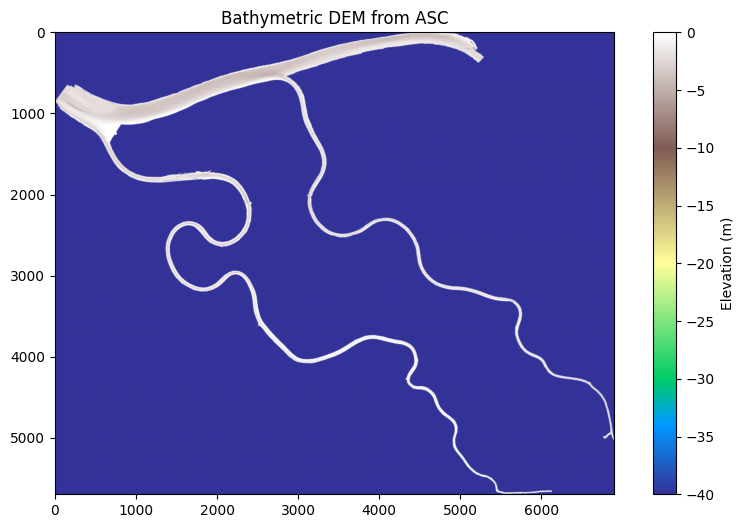

In [10]:
import rasterio
import matplotlib.pyplot as plt

asc_file = "/content/Apr19_bathy_NAVD88.asc"  # Replace with actual filename

# Read the ASC file
with rasterio.open(asc_file) as dataset:
    array = dataset.read(1)  # Read the first band
    transform = dataset.transform  # Get transformation matrix

# Plot the data
plt.figure(figsize=(10, 6))
plt.imshow(array, cmap="terrain", interpolation="bilinear", vmin=-40, vmax=0)
plt.colorbar(label="Elevation (m)")
plt.title("Bathymetric DEM from ASC")
plt.show()

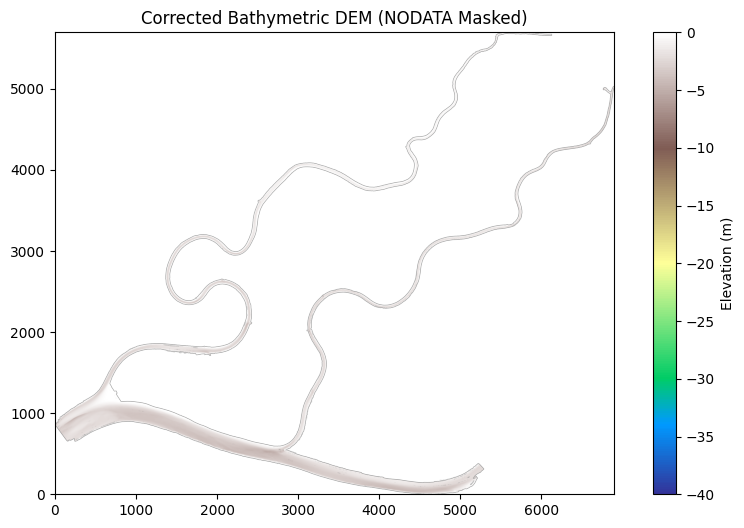

In [11]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Load the ASC file
asc_file = "/content/Apr19_bathy_NAVD88.asc"

with rasterio.open(asc_file) as dataset:
    array = dataset.read(1)
    nodata = dataset.nodata  # Read the NODATA value
    array[array == nodata] = np.nan  # Mask NODATA values

# Set a more realistic color scale for bathymetry
plt.figure(figsize=(10, 6))
plt.imshow(array, cmap="terrain", interpolation="bilinear", origin="lower", vmin=-40, vmax=0)
plt.colorbar(label="Elevation (m)")
plt.title("Corrected Bathymetric DEM (NODATA Masked)")
plt.show()


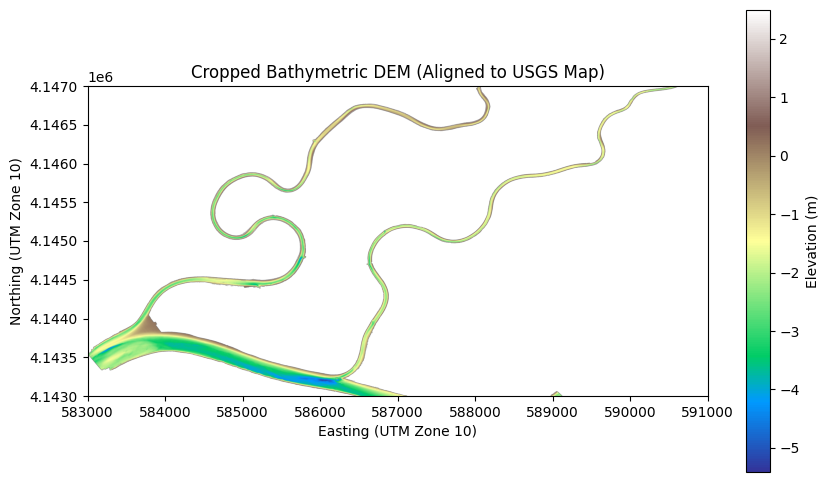

In [12]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# File path
asc_file = "/content/Apr19_bathy_NAVD88.asc"

# Load the ASC file
with rasterio.open(asc_file) as dataset:
    array = dataset.read(1)  # Load elevation data
    nodata = dataset.nodata  # Get NODATA value
    array[array == nodata] = np.nan  # Mask NODATA values

    # Get UTM transformation
    transform = dataset.transform
    x_min, y_max = transform * (0, 0)  # Top-left corner
    x_max, y_min = transform * (array.shape[1], array.shape[0])  # Bottom-right corner

    # Generate UTM coordinate arrays
    x_coords = np.linspace(x_min, x_max, array.shape[1])
    y_coords = np.linspace(y_max, y_min, array.shape[0])

    # Find index range for cropping
    x_range = (583000, 591000)
    y_range = (4143000, 4147000)

    x_indices = np.where((x_coords >= x_range[0]) & (x_coords <= x_range[1]))[0]
    y_indices = np.where((y_coords >= y_range[0]) & (y_coords <= y_range[1]))[0]

    # Crop the array
    cropped_array = array[y_indices.min():y_indices.max(), x_indices.min():x_indices.max()]

# Plot the cropped DEM
plt.figure(figsize=(10, 6))
plt.imshow(cropped_array, cmap="terrain", interpolation="bilinear", origin="lower",
           extent=[x_range[0], x_range[1], y_range[0], y_range[1]])
plt.colorbar(label="Elevation (m)")
plt.title("Cropped Bathymetric DEM (Aligned to USGS Map)")
plt.xlabel("Easting (UTM Zone 10)")
plt.ylabel("Northing (UTM Zone 10)")
plt.show()


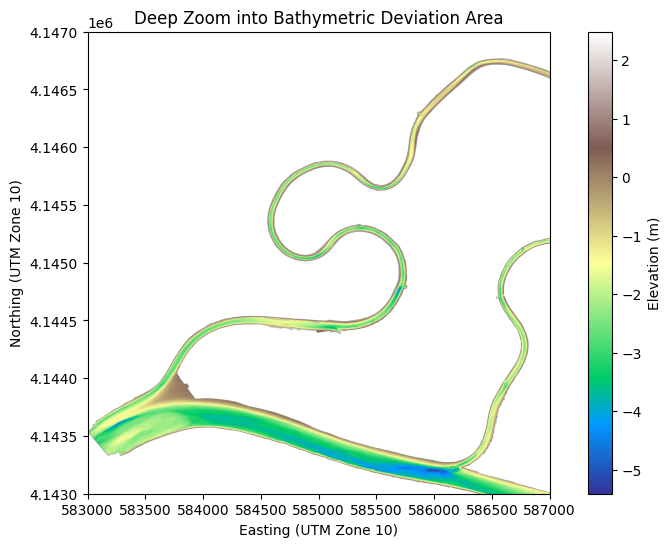

In [19]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# File path
asc_file = "/content/Apr19_bathy_NAVD88.asc"

# Load the ASC file
with rasterio.open(asc_file) as dataset:
    array = dataset.read(1)
    nodata = dataset.nodata
    array[array == nodata] = np.nan  # Mask NODATA values

    # Get UTM transformation
    transform = dataset.transform
    x_min, y_max = transform * (0, 0)
    x_max, y_min = transform * (array.shape[1], array.shape[0])

    # Generate UTM coordinate arrays
    x_coords = np.linspace(x_min, x_max, array.shape[1])
    y_coords = np.linspace(y_max, y_min, array.shape[0])

    # Zoom into a specific area with high variation
    x_range = (583000, 587000)
    y_range = (4143000, 4147000)

    x_indices = np.where((x_coords >= x_range[0]) & (x_coords <= x_range[1]))[0]
    y_indices = np.where((y_coords >= y_range[0]) & (y_coords <= y_range[1]))[0]

    # Crop the array
    zoomed_array = array[y_indices.min():y_indices.max(), x_indices.min():x_indices.max()]

# Plot the zoomed-in section
plt.figure(figsize=(10, 6))
plt.imshow(zoomed_array, cmap="terrain", interpolation="bilinear", origin="lower",
           extent=[x_range[0], x_range[1], y_range[0], y_range[1]])
plt.colorbar(label="Elevation (m)")
plt.title("Deep Zoom into Bathymetric Deviation Area")
plt.xlabel("Easting (UTM Zone 10)")
plt.ylabel("Northing (UTM Zone 10)")
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(bathy_df,
                    x='Longitude',
                    y='Latitude',
                    z='Depth',
                    color='Depth',
                    color_continuous_scale='Viridis',
                    title='Bathymetry 3D Visualization')
fig.update_layout(scene_zaxis_autorange="reversed")
fig.show()

Buffered data was truncated after reaching the output size limit.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.2/515.2 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.3 MB/s eta 0:00:00


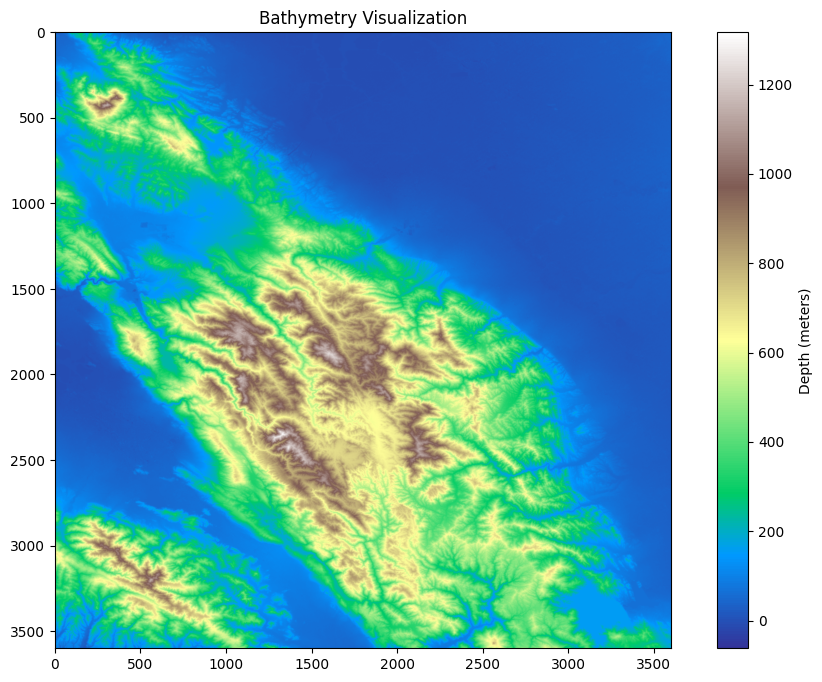

ImportError: localtileserver is not installed. Please install it before proceeding. https://github.com/banesullivan/localtileserver

In [ ]:
# Install required libraries (run once)
!pip install rasterio leafmap matplotlib

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import leafmap

# Load bathymetry data
file_path = '/content/n37_w122_1arc_v3.tif'

# Open the raster file
with rasterio.open(file_path) as src:
    bathymetry = src.read(1)  # Read first band
    profile = src.profile     # Save metadata

# Create a custom colormap for bathymetry
colors = ['#000080', '#0066cc', '#66ccff', '#ccffff', '#ffffff']
levels = [-11000, -5000, -1000, -100, 0]  # Adjust based on your data range

# Plot using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(bathymetry, cmap=plt.cm.terrain)  # Built-in terrain colormap
plt.colorbar(im, ax=ax, label='Depth (meters)')
ax.set_title('Bathymetry Visualization')
plt.show()

# Interactive visualization with leafmap
m = leafmap.Map()
m.add_raster(file_path, colormap='terrain', layer_name="Bathymetry")
m.add_colorbar(colors=colors, labels=levels, position='bottomright')
m
